v= 699.3
v= 724.88
v= 713.1
v= 553.06
v= 561.52
v= 544.76
v= 688.08
v= 724.88
v= 871.2
v= 871.2


<IPython.core.display.Javascript object>


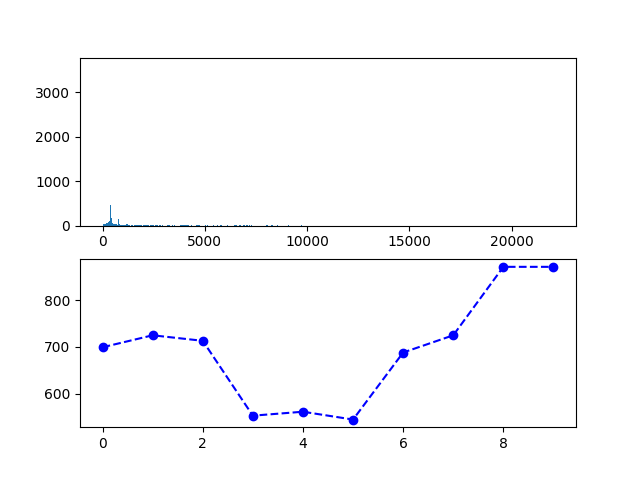

In [14]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import sys
import wave

FORMAT = pyaudio.paInt16    
CHANNELS = 1                
RATE = 44100
CHUNK = 512*16    
p = pyaudio.PyAudio()
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

chastotu=[]
shvudkist=[]
name=open('osnovny tonu real.txt','w')
x = np.arange(0, 2 * CHUNK, 2)  #від 0 до 2*CHUNK з кроком 2    
xf = np.linspace(0, RATE, CHUNK)  #від 0 до RATE розмістити CHUNK точок 

ch=1400
c=340
for i in range(10):
    stream.start_stream()
    znach1 = np.frombuffer(stream.read(CHUNK),dtype=np.int16)
    stream.stop_stream()
    
    yf = fft(znach1)
    yf2=[]
    for k in range(len(yf)):
        yf2.append(abs(yf[k])/(0.5 * CHUNK))
    chastotu.append(round(xf[yf2.index(max(yf2[0:int(len(yf2)/4)]))]))
    name.write(str(chastotu[-1])+' '+str(round(max(yf2)))+'\n')
    if ch<chastotu[-1]:
        v=c*(1-ch/chastotu[-1])
    else:
        v=c*(ch/chastotu[-1]-1)
    shvudkist.append(v)
    print('v=',round(v,2))
# audio_file = wave.open(filename)
# CHANNELS2 = audio_file.getnchannels()
# print(CHANNELS2)

name.close()

%matplotlib notebook


fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(xf[:int(len(xf)/2)],yf2[:int(0.5*len(yf2))],width =5)

ax2 = fig.add_subplot(2, 1, 2)
x2=[k for k in range(len(chastotu))]
ax2.plot(x2, shvudkist, color='blue', marker='o', linestyle='--')
# print(xf[yf2.index(max(yf2))],max(yf2))